In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.lines import Line2D
import random
import matplotlib.patches as mpatches
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats 



In [2]:
data= pd.read_csv(r'C:\Users\Admin\Downloads\Baidu_ir - Sheet1.csv')

# DATA CLEANING AND MANIPULATION

In [3]:
data.shape

(22, 7)

<Axes: >

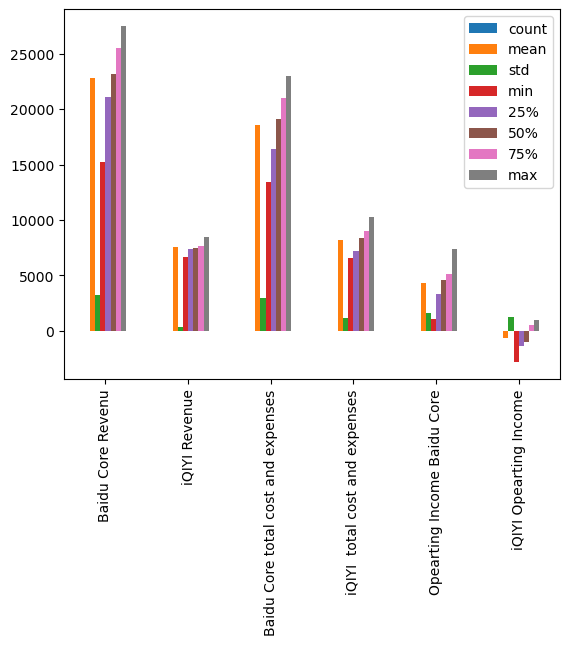

In [4]:
data.describe().T.plot(kind='bar')


In [5]:
data.describe()

,Baidu Core Revenu,iQIYI Revenue,Baidu Core total cost and expenses,iQIYI total cost and expenses,Opearting Income Baidu Core,iQIYI Opearting Income
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,22861.090909,7526.500000,18568.090909,8167.409091,4293.000000,-640.909091
std,3233.013719,379.508925,2985.355334,1137.657269,1597.107206,1236.457686
min,15268.000000,6657.000000,13420.000000,6531.000000,1091.000000,-2832.000000
25%,21102.000000,7391.000000,16428.250000,7166.500000,3364.000000,-1352.750000
50%,23135.500000,7484.000000,19086.000000,8381.000000,4553.000000,-994.500000
75%,25550.250000,7692.750000,21041.250000,8975.750000,5138.750000,543.000000
max,27488.000000,8439.000000,23020.000000,10229.000000,7404.000000,949.000000


# CHECKING FOR NAN VALUES IN DATA

In [6]:
data.isnull().sum()

Quarter Report Date                   0
Baidu Core Revenu                     0
iQIYI Revenue                         0
Baidu Core total cost and expenses    0
iQIYI  total cost and expenses        0
Opearting Income Baidu Core           0
iQIYI Opearting Income                0
dtype: int64

## CHECKING FOR DUPLICATE IN DATA

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Quarter Report Date', 'Baidu Core Revenu', 'iQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income'],
      dtype='object')

In [9]:
data.head()

,Quarter Report Date,Baidu Core Revenu,iQIYI Revenue,Baidu Core total cost and expenses,iQIYI total cost and expenses,Opearting Income Baidu Core,iQIYI Opearting Income
0,30-06-2024,26687,7439,21079,7097,5608,342
1,31-03-2024,23803,7927,19265,6982,4538,945
2,31-12-2023,27488,7707,22820,6934,4668,773
3,30-09-2023,26572,8015,21074,7268,5498,747
4,30-06-2023,26407,7802,21839,7192,4568,610


## RENAMING COLUMNS

In [10]:
data.rename(columns= {'Quarter Report Date':'Date'}, inplace=True)

### CONVERTING DATEIME INTO DAYS, MONTH AND YEAR 

In [11]:
### Create column 'day of week' ###
data['Date']= pd.to_datetime(data['Date'])
### Create column 'day of week' ###
data['Day_of_week'] = pd.to_datetime(data['Date']).dt.strftime("%a")

### Create column 'month' ###
data['Month'] = pd.to_datetime(data['Date']).dt.strftime("%b")

### Create column 'year' ###
data['Year'] = pd.to_datetime(data['Date']).dt.strftime("%Y")


C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\3123363295.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']= pd.to_datetime(data['Date'])


In [12]:
data.columns

Index(['Date', 'Baidu Core Revenu', 'iQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year'],
      dtype='object')

## DROPPING OLD DATE VARIABLE

In [13]:

#drop column Date
data.drop('Date',axis=1, inplace=True)

In [14]:
data.columns

Index(['Baidu Core Revenu', 'iQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year'],
      dtype='object')

## CHECKING NEW COLUMNS

In [15]:
data.columns

Index(['Baidu Core Revenu', 'iQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year'],
      dtype='object')

## CONVERTING DATETIME INTO QUATERLY(SEASONS)

In [16]:
### Create column 'season' ###
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['Month'] in Q1:
        return 'Q1'
    if row['Month'] in Q2:
        return 'Q2'
    if row['Month'] in Q3:
        return 'Q3'
    if row['Month'] in Q4:
        return 'Q4'
data['Season'] = data.apply(month_handler,axis=1)

In [17]:
data.columns

Index(['Baidu Core Revenu', 'iQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year', 'Season'],
      dtype='object')

In [18]:
data['Season'].value_counts()

Season
Q2    6
Q1    6
Q4    5
Q3    5
Name: count, dtype: int64

In [19]:
data.head()

,Baidu Core Revenu,iQIYI Revenue,Baidu Core total cost and expenses,iQIYI total cost and expenses,Opearting Income Baidu Core,iQIYI Opearting Income,Day_of_week,Month,Year,Season
0,26687,7439,21079,7097,5608,342,Sun,Jun,2024,Q2
1,23803,7927,19265,6982,4538,945,Sun,Mar,2024,Q1
2,27488,7707,22820,6934,4668,773,Sun,Dec,2023,Q4
3,26572,8015,21074,7268,5498,747,Sat,Sep,2023,Q3
4,26407,7802,21839,7192,4568,610,Fri,Jun,2023,Q2


## CHECKING FREQUENCY OF BAIDU REVENUE USING HISTOGRAM PLOT

<Axes: xlabel='Baidu Core Revenu', ylabel='Count'>

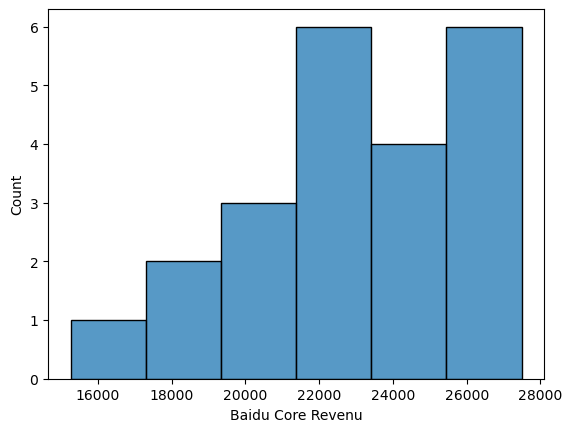

In [20]:
sns.histplot(data['Baidu Core Revenu'])
#In this visualization we were able to tell there's an increase in revenue between 22000-2400 and 25000-27000.


C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1756124256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Baidu Core Revenu'])


skewness: -0.615380
Kurtosis:-0.104469


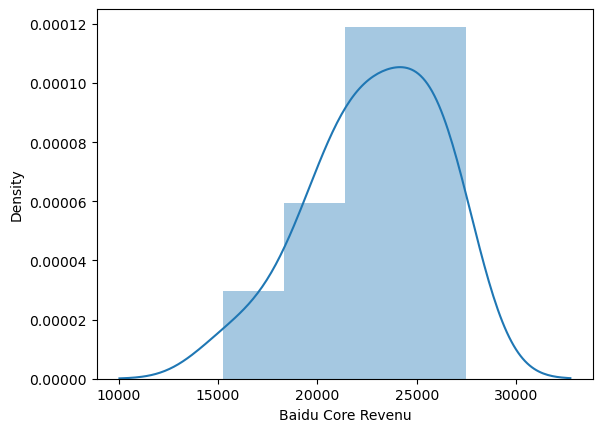

In [21]:
sns.distplot(data['Baidu Core Revenu'])
#skewness and kurtosis
print("skewness: %f" % data['Baidu Core Revenu'].skew())
print("Kurtosis:%f" % data['Baidu Core Revenu'].kurt())


## CATEGORICAL VS NUMERICAL GRAPH USING SCATTER PLOT 

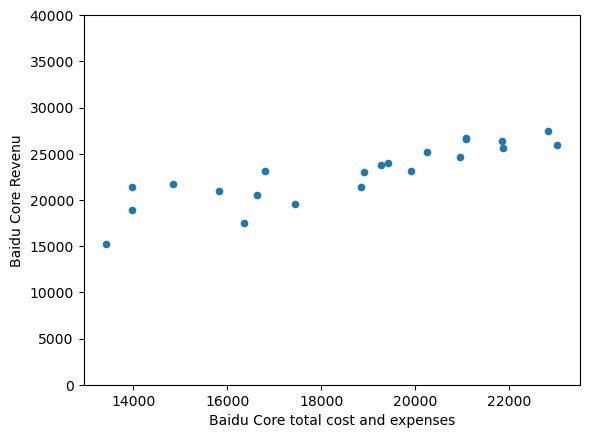

In [22]:
#Bivariate Analysis
#This is when two variable has an effect on each other,this can help find outliers


baidu_data_multi = pd.concat([data['Baidu Core Revenu'], data['Baidu Core total cost and expenses']], axis = 1)
data.plot.scatter(x= 'Baidu Core total cost and expenses' , y = 'Baidu Core Revenu', ylim= (0, 40000));


C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\3682845909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Baidu Core total cost and expenses'])


skewness: -0.274458
Kurtosis:-1.107198


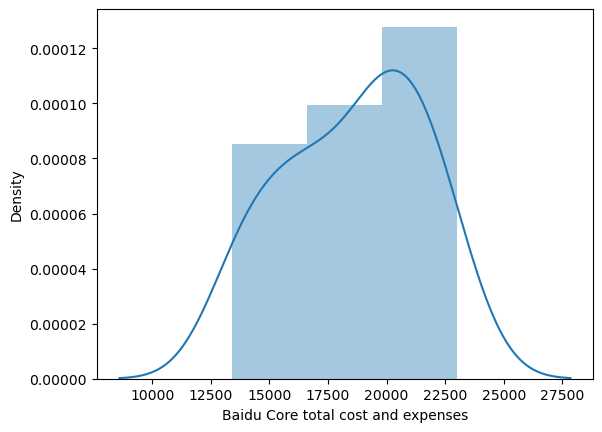

In [23]:
#skewness and kurtosis
sns.distplot(data['Baidu Core total cost and expenses'])
print("skewness: %f" % data['Baidu Core total cost and expenses'].skew())
print("Kurtosis:%f" % data['Baidu Core total cost and expenses'].kurt())


In [24]:
data.rename(columns= {'iQIYI Revenue':'IQIYI Revenue'}, inplace=True)


In [25]:
data.columns

Index(['Baidu Core Revenu', 'IQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year', 'Season'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\637478631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['IQIYI Revenue'])


skewness: 0.105993
Kurtosis:1.175517


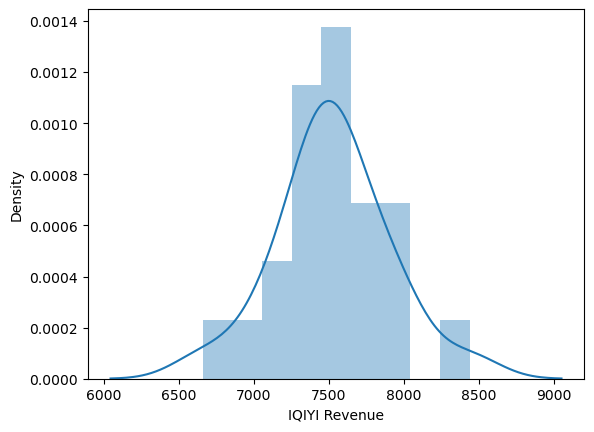

In [26]:
sns.distplot(data['IQIYI Revenue'])
print("skewness: %f" % data['IQIYI Revenue'].skew())
print("Kurtosis:%f" % data['IQIYI Revenue'].kurt())


## DESCRIPTIVE ANALYSIS 

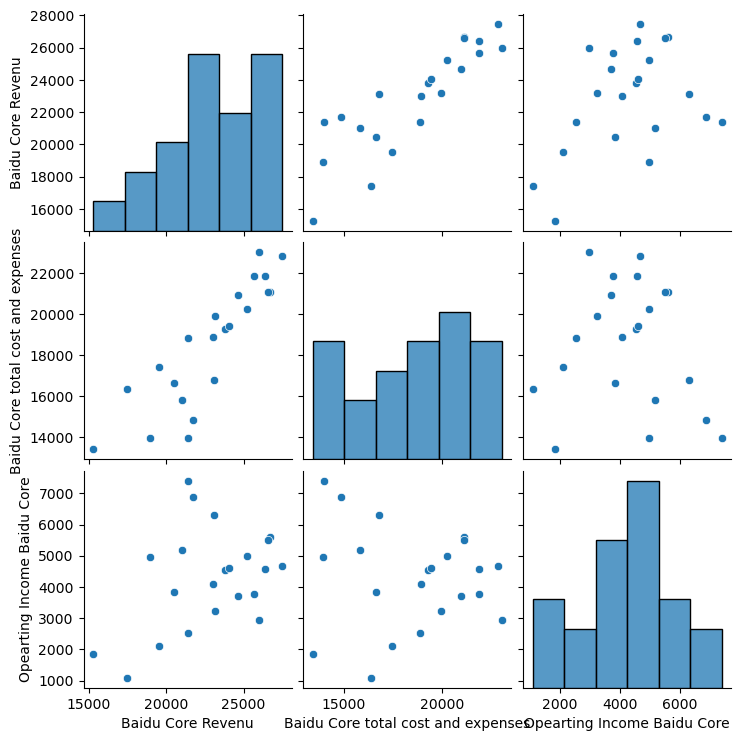

In [27]:
#pair plot 
#plot thr pair plot of Baidu Core Revenu, Baidu Core total cost and Opearting Income Baidu Core:

sns.pairplot(data = data, vars= ['Baidu Core Revenu','Baidu Core total cost and expenses','Opearting Income Baidu Core'])
plt.show()


## CORRELATION OR RELATIONSHIP BETWEEN BAIDU CORE REVENUE,BAIDU CORE TOTAL AND EXPENSIS,OPERATING INCOME BAIDU CORE

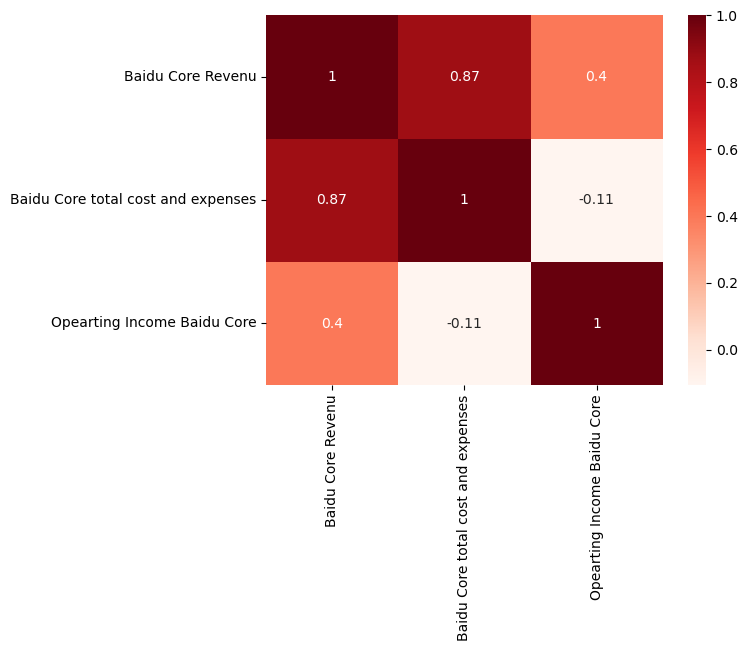

In [28]:
#Correlation Matrix
#Creating a correlation matrix using Baidu Core Revenu,Baidu Core total cost and Opearting Income Baidu Core as rows and coloumns
sns.heatmap(data[['Baidu Core Revenu','Baidu Core total cost and expenses','Opearting Income Baidu Core']].corr(),annot= True,cmap = 'Reds')
plt.show()
#In this visualiazation its observable that Baidu Core Revenu and Baidu Core total cost and expenses has a strong correlation of 0.87,which is good but
#not perfect.This only suggest there's a strong relationship between them,as one increases the other increases and vice versa


In [29]:
data['Year'].value_counts()
#Here in this visualization I converted the datetime provided into year to observe the year trend,and was able to observe
#there's a dro in 2024

Year
2023    4
2022    4
2021    4
2020    4
2019    4
2024    2
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Count'>

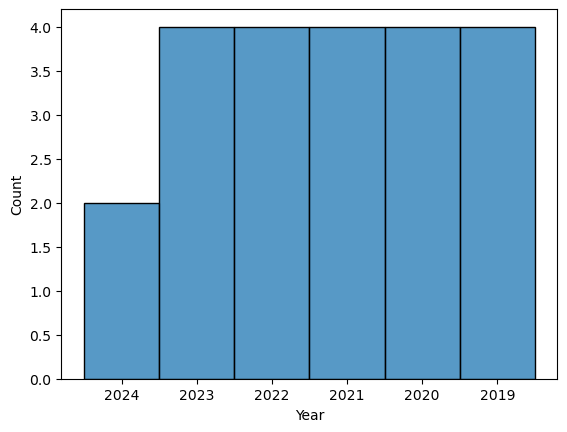

In [30]:
sns.histplot(data['Year'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\2382231606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])


<Axes: xlabel='Year', ylabel='Density'>

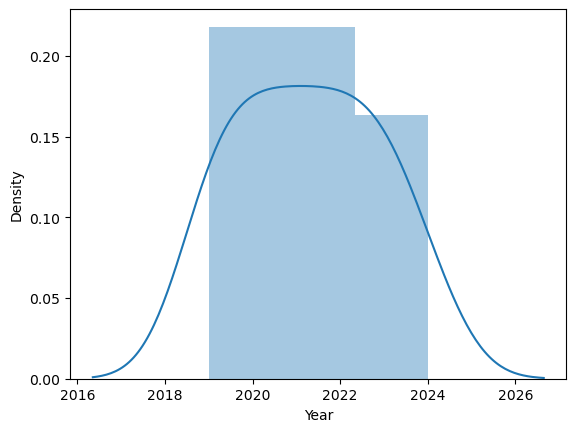

In [31]:
sns.distplot(data['Year'])

<Axes: xlabel='Month', ylabel='Count'>

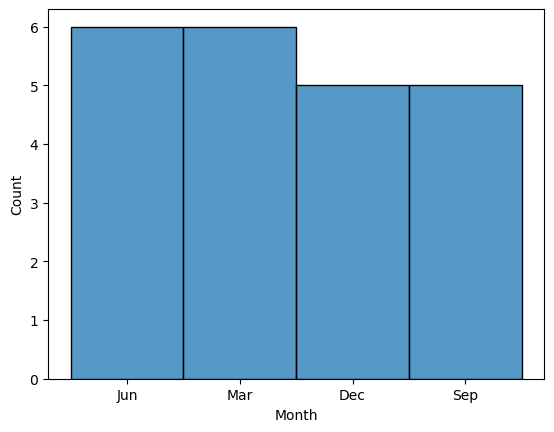

In [32]:
sns.histplot(data['Month'])

<Axes: xlabel='Day_of_week', ylabel='Count'>

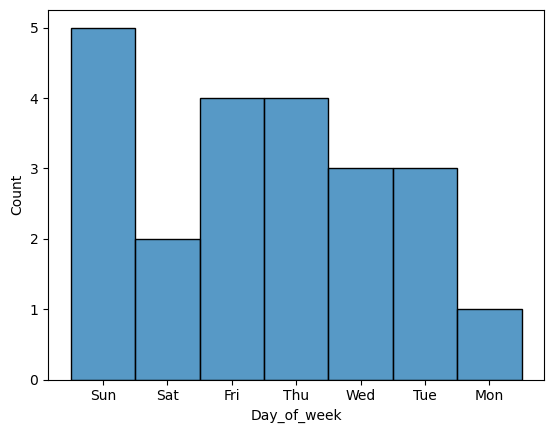

In [33]:
sns.histplot(data['Day_of_week'])
#In this visualization its easy to see that Sunday has the highest output.

## TRENDS IN REVENUE IN DAYS OF THE WEEK VS BAIDU CORE REVENUE

<BarContainer object of 22 artists>

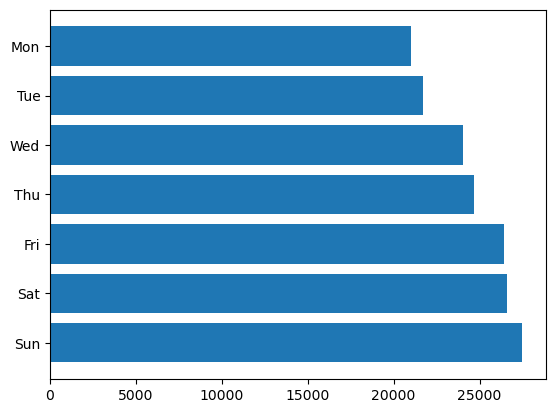

In [34]:
plt.barh(data['Day_of_week'],data['Baidu Core Revenu'])

<Axes: xlabel='Season', ylabel='Count'>

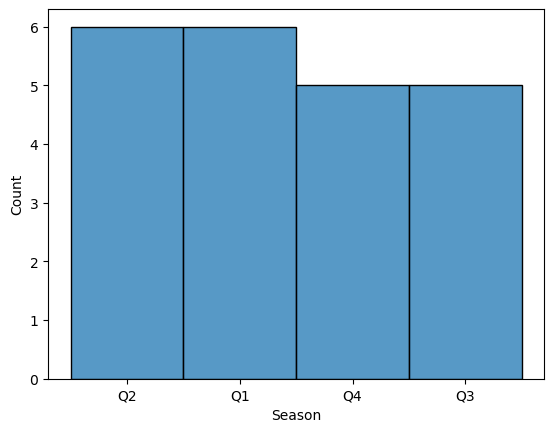

In [35]:
sns.histplot(data['Season'])
#Here in this visualization i converted the datetime to quaterly,to observe the season with high performance

## TRENDS BY SEASON/QUATERLY BAIDU CORE REVENUE

Text(0, 0.5, 'Season')

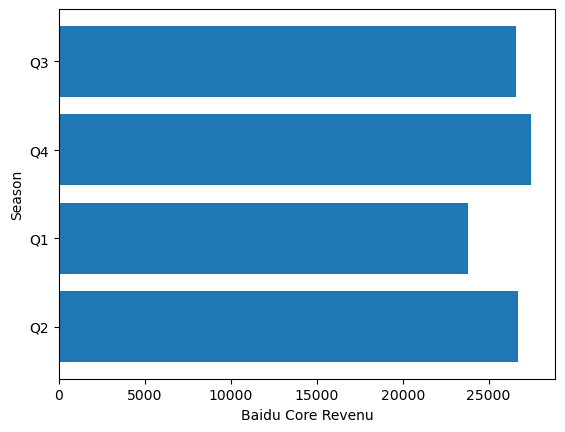

In [36]:
plt.barh(data['Season'],data['Baidu Core Revenu'])
plt.xlabel('Baidu Core Revenu')
plt.ylabel('Season')
#

## PAIR VISUALIZATION BY MONTH VS BAIDU CORE TOTAL COST AND EXPENSES VS OPERATING INCOME BAIDU CORE

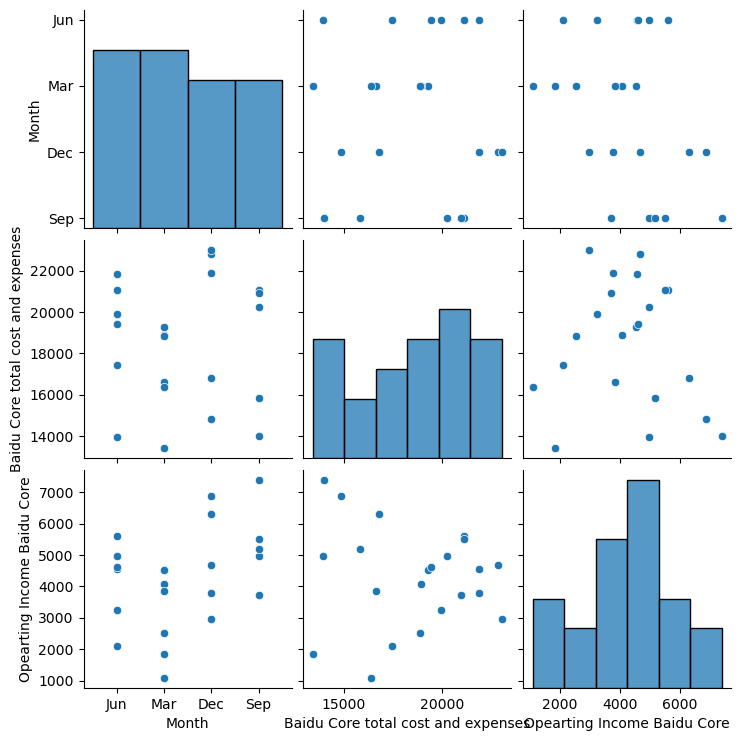

In [37]:
sns.pairplot(data = data, vars= ['Month','Baidu Core total cost and expenses','Opearting Income Baidu Core'])
plt.show()

## PAIR VISUALIZATION BY YEAR VS BAIDU CORE TOTAL COST AND EXPENSES VS OPERATING INCOME BAIDU CORE

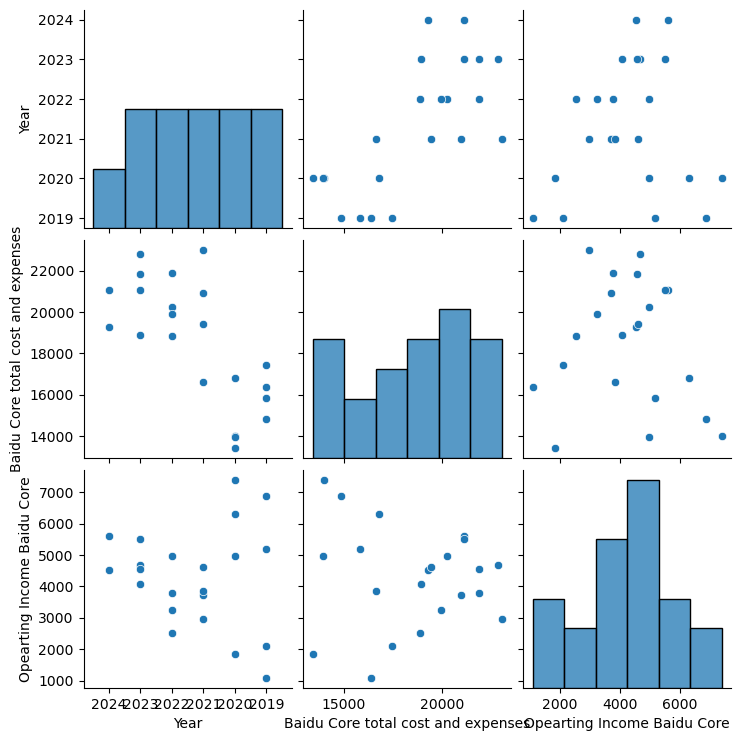

In [38]:
sns.pairplot(data = data, vars= ['Year','Baidu Core total cost and expenses','Opearting Income Baidu Core'])
plt.show()

## PAIR VISUALIZATION BY WEEK VS BAIDU CORE TOTAL COST AND EXPENSES VS OPERATING INCOME BAIDU CORE

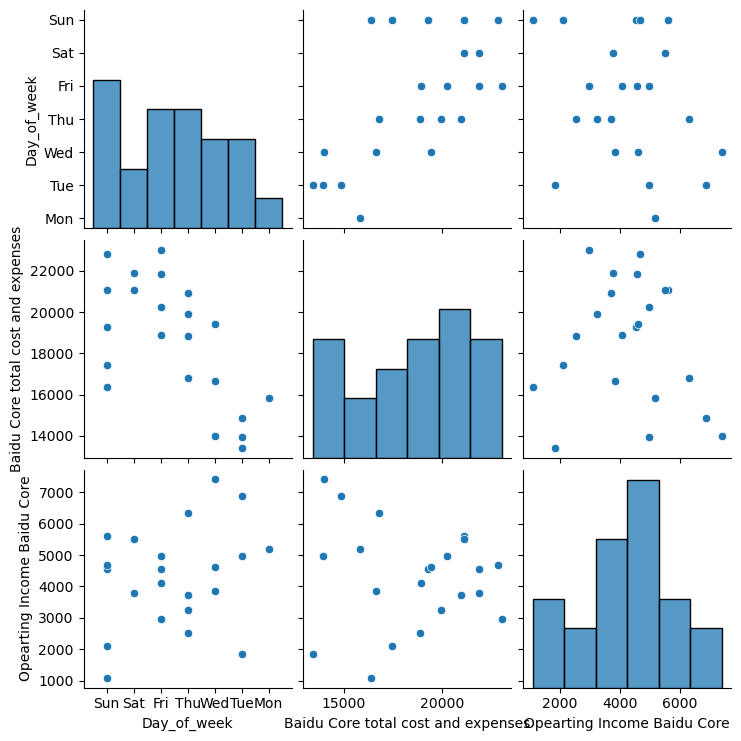

In [39]:
sns.pairplot(data = data, vars= ['Day_of_week','Baidu Core total cost and expenses','Opearting Income Baidu Core'])
plt.show()

## PAIR VISUALIZATION BY QUATRLY/SEASON VS BAIDU CORE TOTAL COST AND EXPENSES VS OPERATING INCOME BAIDU CORE

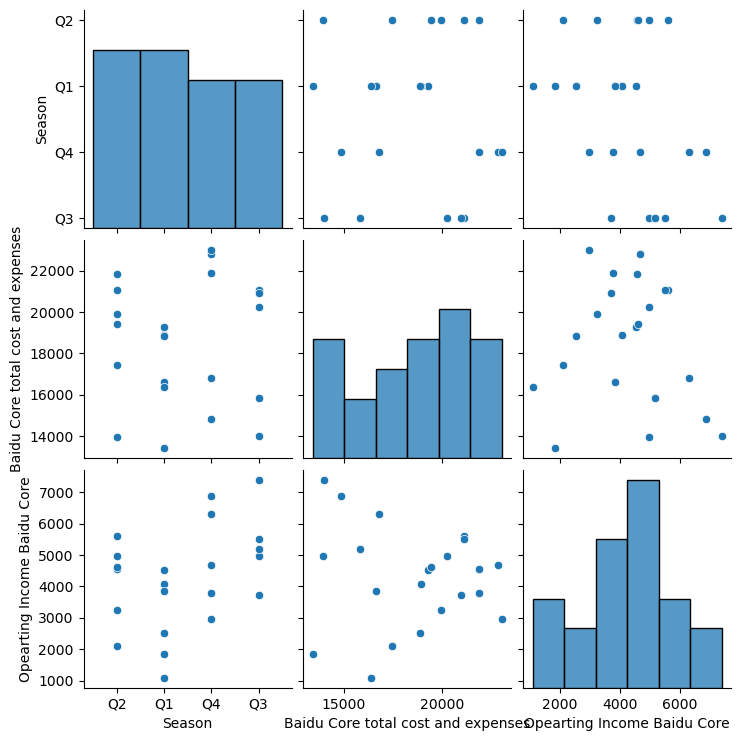

In [40]:
sns.pairplot(data = data, vars= ['Season','Baidu Core total cost and expenses','Opearting Income Baidu Core'])
plt.show()

In [41]:
data.rename(columns= {"iQIYI total cost and expenses":"IQIYI total cost and expenses"}, inplace= True)


In [91]:
data.columns

Index(['Baidu Core Revenu', 'IQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year', 'Season'],
      dtype='object')

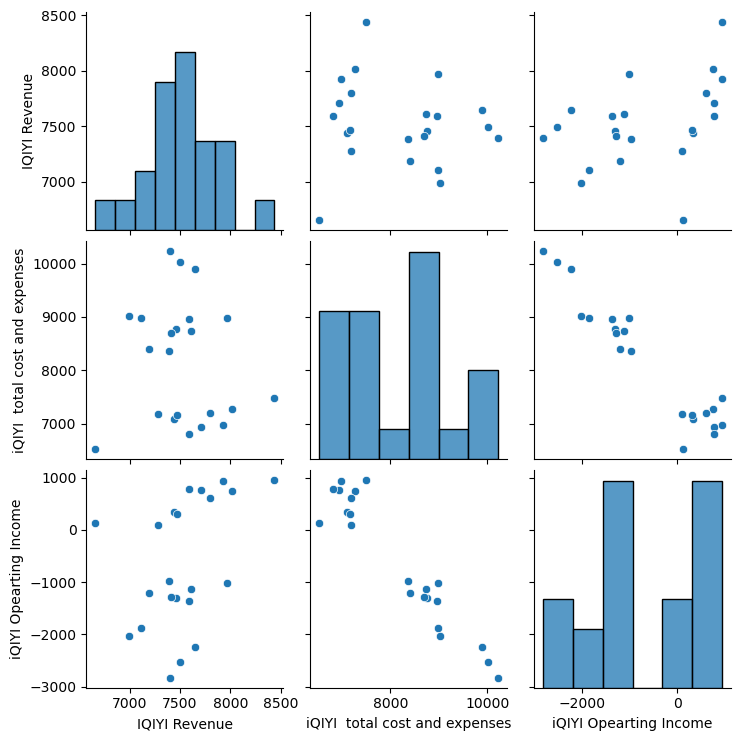

In [92]:
sns.pairplot(data = data, vars= ['IQIYI Revenue','iQIYI  total cost and expenses','iQIYI Opearting Income'])
plt.show()

## PAIR VISUALIZATION BY MONTH VS IQIYI Revenue VS iQIYI TOTAL COST AND EXPENSES VS iQILI OPERATING INCOME 

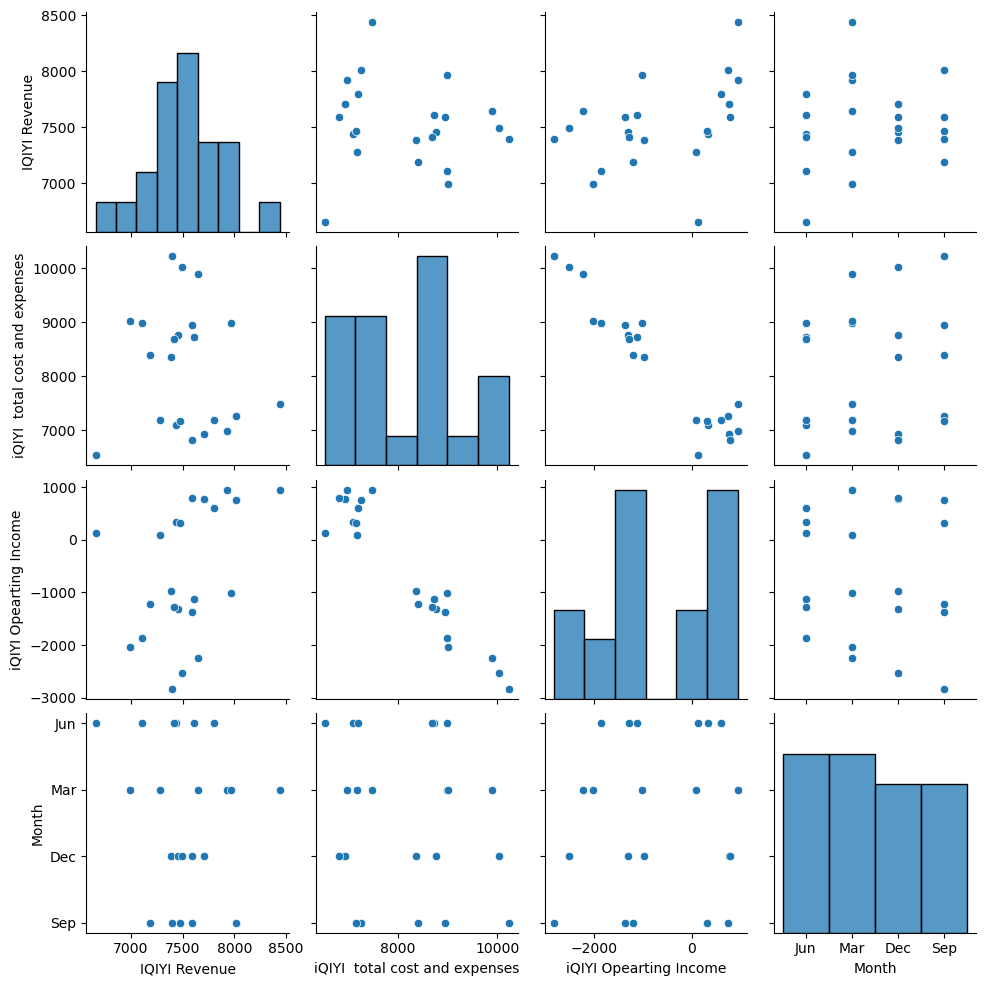

In [43]:
sns.pairplot(data = data, vars= ['IQIYI Revenue','iQIYI  total cost and expenses','iQIYI Opearting Income','Month'])
plt.show()

## CORRELATION BETWEEN MONTH VS IQIYI Revenue VS iQIYI TOTAL COST AND EXPENSES VS iQIYI OPERATING INCOME

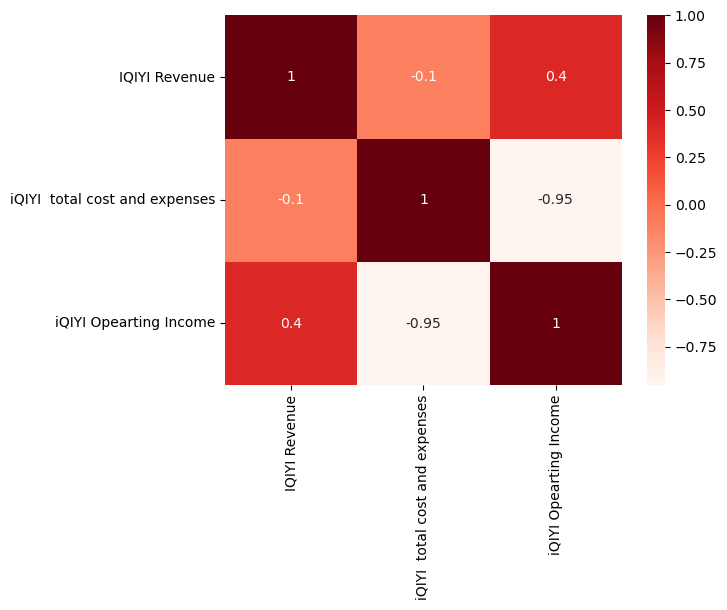

In [44]:
#Correlation Matrix
#Creating a correlation matrix using IQIYI Revenue,iQIYI  total cost and expenses,iQIYI Opearting Income as rows and coloumns
sns.heatmap(data[['IQIYI Revenue','iQIYI  total cost and expenses','iQIYI Opearting Income']].corr(),annot= True,cmap = 'Reds')
plt.show()
#In this correlation between variables,its observed that there's a negative correlation of -0.95,which means a perfect negative linear relationship 
#betwen iQIYI  total cost and expenses,and iQIYI Opearting Income where one variable decreases exactly as the other increases in a perfectly predictable
#manner. while on the other hand,-0.1 and -0.4 means a weak negative relationship, where changes in one variable are not strongly associated with changes in the
#other.

Text(0, 0.5, 'Month')

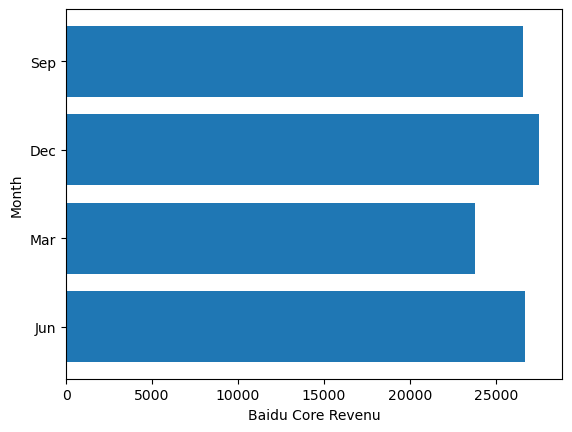

In [45]:
plt.barh(data['Month'],data['Baidu Core Revenu'])
plt.xlabel('Baidu Core Revenu')
plt.ylabel('Month')
#In this visualization its observable that in the Month of Jun and Dec there's a high increase of 26000 and 27000 respectvely in Baidu Core revenue.

Text(0.5, 1.05, 'PAIRPLOT 0F QUARTERLY/SEASON VS IQIYI Revenue VS Baidu Core Revenu')

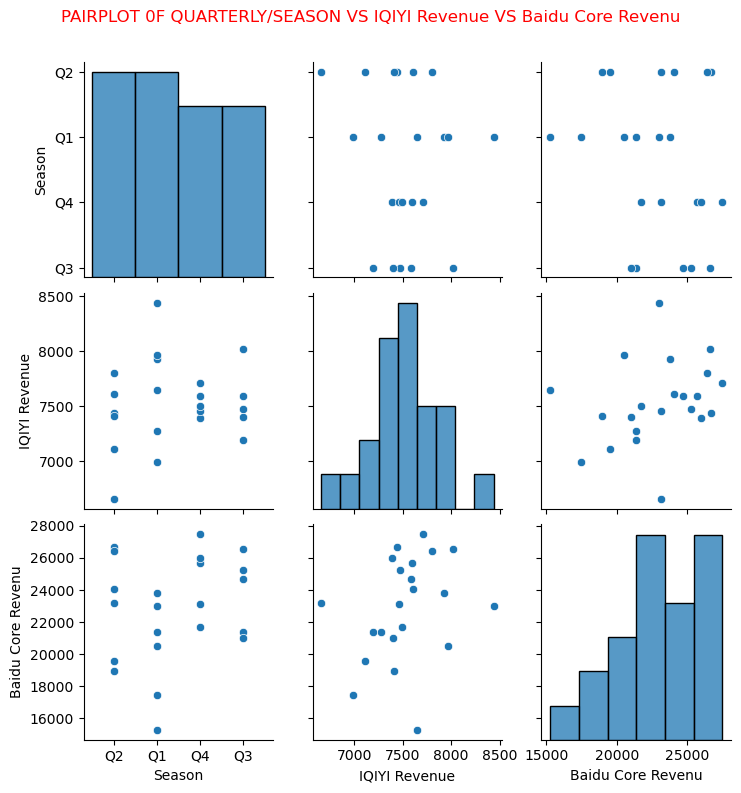

In [46]:
g=sns.pairplot(data= data, vars=['Season','IQIYI Revenue','Baidu Core Revenu'])
g.fig.suptitle("PAIRPLOT 0F QUARTERLY/SEASON VS IQIYI Revenue VS Baidu Core Revenu",  y=1.05, c= 'red')
#plt.title('PAIRPLOT 0F QUARTERLY/SEASON VS IQIYI Revenue VS Baidu Core Revenu')

#In this visualization,its observable Q1 has the highest IQIYI Revenue of 8000,which is the highest quarterly revenue generated for 
#Baidu (百度) quarterly revenue iQIYI video site.
#This obsevation tells that the revenue genearted from IQIYI


## QUANTITATIVE ANALYSIS

In [90]:
data.pivot_table(index= 'Year', values= 'Baidu Core Revenu', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\4013400475.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.pivot_table(index= 'Year', values= 'Baidu Core Revenu', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\4013400475.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.pivot_table(index= 'Year', values= 'Baidu Core Revenu', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\4013400475.py:1: FutureWarning: The provided callable <built-in function sum> is currently u

,max,min,sum
,Baidu Core Revenu,Baidu Core Revenu,Baidu Core Revenu
Year,,,
2019,21711,17450,79711
2020,23111,15268,78684
2021,25978,20483,95163
2022,25654,21378,95431
2023,27488,22998,103465
2024,26687,23803,50490
Grand total,27488,15268,502944


In [53]:
maximum_baidu

Month
Dec    27488
Jun    26687
Mar    23803
Sep    26572
Name: Baidu Core Revenu, dtype: int64

In [88]:
data.pivot_table(index= 'Month', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\870278598.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.pivot_table(index= 'Month', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\870278598.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.pivot_table(index= 'Month', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\870278598.py:1: FutureWarning: The provided callable <built-in function sum> is currently using Data

,max,min,sum
,IQIYI Revenue,IQIYI Revenue,IQIYI Revenue
Month,,,
Dec,7707,7389,37644
Jun,7802,6657,44028
Mar,8439,6990,46251
Sep,8015,7188,37660
Grand total,8439,6657,165583


In [62]:
maximum_iQYLI_revenue =data.groupby('Month')['IQIYI Revenue'].max()
print(maximum_iQYLI_revenue)

Month
Dec    7707
Jun    7802
Mar    8439
Sep    8015
Name: IQIYI Revenue, dtype: int64


In [64]:
minimum_iQYLI_revenue =data.groupby('Month')['IQIYI Revenue'].min()
print(minimum_iQYLI_revenue)

Month
Dec    7389
Jun    6657
Mar    6990
Sep    7188
Name: IQIYI Revenue, dtype: int64


In [87]:
data.pivot_table(index= 'Year', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\2556572854.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.pivot_table(index= 'Year', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\2556572854.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.pivot_table(index= 'Year', values= 'IQIYI Revenue', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\2556572854.py:1: FutureWarning: The provided callable <built-in function sum> is currently using Dat

,max,min,sum
,IQIYI Revenue,IQIYI Revenue,IQIYI Revenue
Year,,,
2019,7497,6990,28994
2020,7650,7188,29708
2021,7968,7389,30554
2022,7593,6657,28998
2023,8439,7707,31963
2024,7927,7439,15366
Grand total,8439,6657,165583


In [80]:
data.pivot_table(index= 'Year', values= 'iQIYI Opearting Income', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1205153182.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.pivot_table(index= 'Year', values= 'iQIYI Opearting Income', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1205153182.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.pivot_table(index= 'Year', values= 'iQIYI Opearting Income', aggfunc = [max,min,sum],margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1205153182.py:1: FutureWarning: The provided callable <built-in function sum> is c

,max,min,sum
,iQIYI Opearting Income,iQIYI Opearting Income,iQIYI Opearting Income
Year,,,
2019,-1872,-2832,-9258
2020,-1210,-2242,-6041
2021,-975,-1368,-4479
2022,782,94,1312
2023,949,610,3079
2024,945,342,1287
Grand total,949,-2832,-14100


In [81]:
data.pivot_table(index= 'Year', values= 'iQIYI  total cost and expenses', aggfunc = [max,min,sum], margins=True,margins_name='Grand total')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1144814159.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.pivot_table(index= 'Year', values= 'iQIYI  total cost and expenses', aggfunc = [max,min,sum], margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1144814159.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.pivot_table(index= 'Year', values= 'iQIYI  total cost and expenses', aggfunc = [max,min,sum], margins=True,margins_name='Grand total')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24024\1144814159.py:1: FutureWarning: The provided callable <built-in 

,max,min,sum
,iQIYI total cost and expenses,iQIYI total cost and expenses,iQIYI total cost and expenses
Year,,,
2019,10229,8982,38252
2020,9892,8398,35749
2021,8982,8364,35033
2022,7183,6531,27686
2023,7490,6934,28884
2024,7097,6982,14079
Grand total,10229,6531,179683


### KEY NOTES FROM ANALYSIS OF THE ROLE OF iQIYI IN BUSINESS OF BAIDU IN MONETARY TERMS.
-FROM THE DATA PROVIDED,I OBSERVATION KEY PROBLEMS IN REVENUE VS TOTAL EXPENSES VS OPERATING INCOME WHICH ARE AS FOLLOWS:
1. I OBSERVED THE REVENUE GENERATED FOR THE YEARS(2019,2020,2021,2022,2023) WHICH ARE 28944,29708,30554,28998,31963,15363 RESPECTIVELY GENERATED A GRAND
   TOTAL= 165583 AGAINST TOTAL COST AND EXPENSES OF 179683(165583-179683= -14,100),ON THIS WE CAN TELL THE REVENUE IS BELOW TOTAL COST AND EXPENSES THE
   COMPANY RUNNED FOR THE PAST 6YEARS.
2. LOOKING AT OUR REVENUE TREND,THERE WAS A PEAK IN REVENUE BETWEEN 2021 AND 2023,AND MINIMUM REVENUE IN THE YEAR 2019.
3. ALSO FROM OBSEVATION THE OPERATING INCOME FOR THE PAST 6YEARS IN GRAND TOTAL IS -14100,MEANING THERE HAS BEEN A 0 PROFIT FROM RUNNING OF THIS           BUSINESS.
4. WE CAN SEE THAT REVENUE OF BAIDU BOOSTED A LOT AFTER THE COVID PANDEMIC.
5. RUNNING OF THIS SITE HAS NO POSITIVE EFFECT ON THE GROWTH OF THE COMPANY INSTEAD A LOSS IN THE LAST 6YEARS.
6. ON THE YEARS WE HAD A PEAK  ON REVENUE i.e 2021(30,554) AND 2023(31,963),DURING THIS PERIOD WE SPENT 35033 AND 28884 RESPECTIVELY,WHICH YIELDED LESS    PROFIT INSTEAD A NEGATIVE PROFIT PERFORMANCE.   
7. FROM OBESERVATION I FOUND OUT WE SPEND MORE THAN THE REVENUE GENERATED FROM iQILI ONLINE SITE WHICH WE NEED TO REDUCE. 

## PREDICTIVE ANALYSIS


In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [227]:
data.columns


Index(['Baidu Core Revenu', 'IQIYI Revenue',
       'Baidu Core total cost and expenses', 'iQIYI  total cost and expenses',
       'Opearting Income Baidu Core', 'iQIYI Opearting Income', 'Day_of_week',
       'Month', 'Year', 'Season'],
      dtype='object')

In [264]:
train= data.drop(['iQIYI  total cost and expenses','Day_of_week','Baidu Core Revenu', 'Month', 'Year','Season','Baidu Core total cost and expenses','Opearting Income Baidu Core'], axis=1)
test = data['iQIYI  total cost and expenses']


In [411]:
X_train, X_test,y_train, y_test = train_test_split(train,test,test_size= 0.9,random_state= 2)


In [412]:
regr = LinearRegression().fit(X_train,y_train)
#regr.fit(X_train,y_train)


In [413]:
pred = regr.predict(X_test)


In [414]:
pred
#data['iQILI REVENUE PREDICTION'] = pred


array([ 8493.25520343,  6645.41789248,  8644.56764063,  6188.28649829,
       10455.70010068,  9159.49783851,  6432.93913464,  8210.80923499,
        6867.0037603 ,  6496.10627344,  6392.53615756,  8592.33318899,
        6151.78037426,  6253.82842306,  6699.38488101, 10136.79407671,
        9865.03238686,  8781.01801866,  9287.78867237,  8535.59486409])

In [415]:
regr.score(X_test, y_test)

0.7968290687470714